In [188]:
import json
import math
import numpy as np

import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import matplotlib.pyplot as plt
import os

import string
from gensim.models import Word2Vec

----------------------------------------------------------------------------------------

# PEOPLE

### Word2Vec

**Lecture fichier**

In [189]:
# name of the lightest file
file_name = "./jsonBases/topaz-data732--france--fr.sputniknews.africa--20190101--20211231.json"

# open and load file
f = open(file_name, 'r', encoding='utf-8')
data = json.loads(f.read())
f.close()

**Ponctuations**

In [190]:
ponctuations = list(string.punctuation)
ponctuations.append('’')

**Recréation des articles avec seulement les mots importants et dans leur forme simple**

In [191]:
docFinal = []
key = 'per'
tabWord = []

for annee in data["data-all"]:
    for mois in data["data-all"][annee]:
        for article in data["data-all"][annee][mois]:
            dat = data["data-all"][annee][mois][article][0]['content'].split()
            nDat = []
            for mot in dat:
                nMot = mot
                for l in mot:
                    if l in ponctuations:
                        if l == mot[0] or l == mot[len(mot) - 1]:
                            nMot = nMot.replace(l, "")
                        elif l=="’":
                            indice = mot.index(l)
                            nMot = mot.replace(l, "")
                            nMot = mot[:indice - 1] + mot[indice + 1:]

                if nMot in data["data-all"][annee][mois][article][0][key]:
                    nDat.append(nMot)
                    if nMot not in tabWord:
                        tabWord.append(nMot)
            docFinal.append(nDat)

print(docFinal)
documents = [" ".join(doc) for doc in docFinal]
print(documents[0])
print(tabWord)

[[], [], [], [], [], [], [], [], ['Président', 'Président', 'Président'], ['Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek', 'Kierzek'], [], [], ['Figaro', 'Figaro', 'Figaro', 'Figaro'], [], ['M.Anzorov', 'M.Anzorov'], [], [], [], [], [], [], ['Riquier', 'Riquier'], [], ['Legault', 'Legault', 'Legault', 'Legault', 'Legault'], [], [], [], [], [], [], ['Matignon', 'Cadène', 'Cadène', 'Cadène', 'Matignon', 'Cadène', 'Matignon', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène', 'Cadène'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['M.Marquié', 'M.Marquié'], [], [], [], [], [], [], [], [], [], [], ['Asselineau', 'Macron', 'Macron', 'Asselineau', 'Asselineau', 'Asselineau', 'Asselineau', 'Asselineau', 'Asselineau', 'Macron', 'Macron', 'Macron', 'Asselineau', 'Macron', 'Asselineau'], [], [], [], [], [], [], [], [], [], ['Président', 'artémisia', 'Président', 'Président', 'artémisia',

**Création du modèle word2vec avec 2 dimensions**

In [192]:
modele = Word2Vec(docFinal, vector_size=2, window=5)

**Vectorisation des mots**

In [193]:
words = modele.wv

**Similarité entre 2 mots**

In [194]:
mot1 = "Trump"
mot2 = "Macron"
print(words.similarity(mot1, mot2))

-0.9454024


**Mots les plus proches d'un autre**

In [195]:
mot = "Macron"
print(words.most_similar(mot))

[('Zelensky', 0.9999963045120239), ('Audin', 0.9997468590736389), ('Boudiaf', 0.9996306300163269), ('Ciotti', 0.9971050024032593), ('Navalny', 0.9963686466217041), ('Griveaux', 0.9946802258491516), ('Boumaârafi', 0.9899868965148926), ('Président', 0.9887009859085083), ('Zelenski', 0.9816705584526062), ('Steve', 0.980051577091217)]


**Mots les plus proches de la conjonction de "mot1" et "mot2" avec "nbMots" mots**

In [196]:
mot1 = "Trump"
mot2 = "Macron"
nbMots = 4
print(words.most_similar(positive=[mot1, mot2], topn=nbMots))

[('Staline', 1.0), ('Morano', 0.9995846748352051), ('Gbagbo', 0.9864715337753296), ('Marine', 0.9763993620872498)]


**Mots les plus proches de "mot1" et loin de "mot2" avec "nbMots" mots**

In [197]:
mot1 = "Trump"
mot2 = "Macron"
nbMots = 4
print(words.most_similar(positive=[mot1], negative=[mot2], topn=nbMots))

[('Poutine', 0.9998409152030945), ('Erdogan', 0.999636173248291), ('Asselineau', 0.9901349544525146), ('Galina', 0.9783060550689697)]


**Récupérer un ensemble de donnée dans un dataFrame**

In [198]:
df = pd.DataFrame(words.vectors, columns=['V1', 'V2'], index=words.key_to_index.keys())
print(df.index)

#sauvegarde du data frame
# df.to_csv('./data/Dashboard/per/Word2VecVector/df_per_word2vec_vector----france--fr.sputniknews.africa.csv')

Index(['Président', 'Macron', 'Galina', 'Navalny', 'Trump', 'Haftar',
       'Bouteflika', 'Bardot', 'Pen', 'Erdogan', 'Washington', 'Benalla',
       'Porochenko', 'Elena', 'Mila', 'Camille', 'Legault', 'Poutine',
       'Gaulle', 'Biden', 'Zemmour', 'Théophane', 'Epstein', 'Gbagbo', 'Audin',
       'Marine', 'Assange', 'Emmanuel', 'artémisia', 'Mélenchon', 'Zelensky',
       'Cadène', 'Karima', 'Bloomberg', 'Morano', 'Boudiaf', 'Soral',
       'Snowden', 'BHL', 'Vincent', 'Kierzek', 'Ciotti', 'Bitar', 'Drareni',
       'Raoult', 'Déby', 'Mahomet', 'Hidalgo', 'Asselineau', 'Huawei',
       'Matignon', 'Steve', 'Carlito', 'Noam', 'Bolsonaro', 'Castaner',
       'Renaud', 'Griveaux', 'Zelenski', 'Blanquer', 'Benzema', 'Chengriha',
       'Marianne', 'Staline', 'Handfield', 'Salamé', 'Deschamps', 'Babis',
       'Barkhane', 'Tabib', 'Sergueï', 'Pompeo', 'Orban', 'Béchir',
       'Boumaârafi', 'Ioulia', 'McFly'],
      dtype='object')


**Affichage de ces mots sur un graphique**

C:\Users\Mathieu\AppData\Local\Temp\ipykernel_30696\2726915483.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



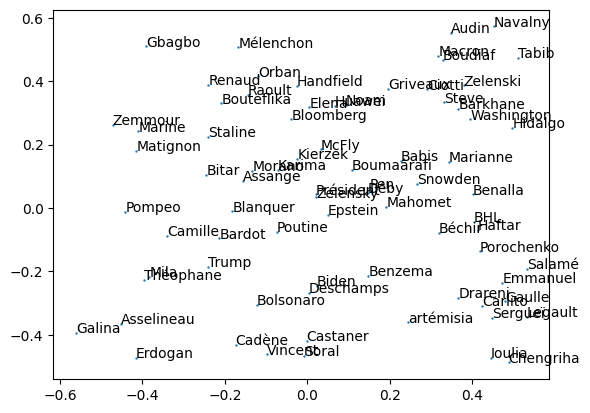

In [199]:
plt.scatter(df.V1, df.V2, s=0.5)
for i in range(df.shape[0]):
    plt.annotate(df.index[i], (df.V1[i], df.V2[i]))
plt.show()

# Matrice de cooccurrence

**Récupération des personnes les plus cités**

In [200]:
articles = ['mali--www.egaliteetreconciliation.fr',
               'mali--french.presstv.ir',
               'mali--fr.sputniknews.africa',
               'france--www.fdesouche.com',
               'france--www.egaliteetreconciliation.fr',
               'france--french.presstv.ir',
               'france--fr.sputniknews.africa']

doc = articles[6]

per = pd.read_csv(f"./data/Dashboard/per/df_per_occ----{doc}.csv")
df_subset_per = per.head(10)

print(df_subset_per)

      People  Somme des valeurs
0     Macron                322
1      Trump                 75
2  Président                 70
3    Poutine                 50
4    Navalny                 49
5     Haftar                 45
6    Zemmour                 43
7   Castaner                 37
8    Benalla                 36
9     Bardot                 36


**Création de la matrice**

In [203]:
#Création de la matrice vide
df = pd.DataFrame(index=df_subset_per['People'].tolist(), columns=df_subset_per['People'].tolist())

#On la remplie de 0
df = df.fillna(0)
print(df)

#On la remplie
for per1 in df_subset_per['People'].tolist() :
    for per2 in df_subset_per['People'].tolist() :
        if per1 in modele.wv.key_to_index and per2 in modele.wv.key_to_index :
            df.at[per1,per2] = int(words.similarity(per1, per2)*100)

# Supprimer les lignes où toutes les valeurs sont zéros
df = df.loc[(df != 0).any(axis=1)]

# Supprimer les colonnes où toutes les valeurs sont zéros
df = df.loc[:, (df != 0).any(axis=0)]


print(df)

fig = px.imshow(df, text_auto=True)
fig.show()

           Macron  Trump  Président  Poutine  Navalny  Haftar  Zemmour  \
Macron          0      0          0        0        0       0        0   
Trump           0      0          0        0        0       0        0   
Président       0      0          0        0        0       0        0   
Poutine         0      0          0        0        0       0        0   
Navalny         0      0          0        0        0       0        0   
Haftar          0      0          0        0        0       0        0   
Zemmour         0      0          0        0        0       0        0   
Castaner        0      0          0        0        0       0        0   
Benalla         0      0          0        0        0       0        0   
Bardot          0      0          0        0        0       0        0   

           Castaner  Benalla  Bardot  
Macron            0        0       0  
Trump             0        0       0  
Président         0        0       0  
Poutine           0        0 

**Sauvegarde du data frame**

In [202]:
# df.to_csv('./data/Dashboard/per/Word2VecMatrice/df_per_word2vec----france--fr.sputniknews.africa.csv', index=False)